### 一元线性回归的梯度下降

下面使用梯度下降算法来求解前面的线性回归问题，我们知道，对一元线性回归，损失函数为：

$$
loss = J(a, b) = \frac{1}{2m} \sum_{i=1}^{m}(y_i - (ax_i + b))^2
$$

这是一个二元二次方程，我们对该方程求梯度，也就是分别对参数 a 和 b 求偏导，得到参数的更新公式：

$$
\begin{align}
a &:= a - \eta \frac{\partial J(a, b)}{\partial a} \\
b &:= b - \eta \frac{\partial J(a, b)}{\partial b} \\
\end{align}
$$

将损失函数带入上式求导，得到：

$$
\begin{align}
a &:= a - \eta \frac{1}{m} \sum_{i=1}^{m}(y_i - (ax_i + b))x_i \\
b &:= b - \eta \frac{1}{m} \sum_{i=1}^{m}(y_i - (ax_i + b))
\end{align}
$$

我们使用代码来实现这个过程，先来看一个最简单的例子，手工造几个散点，然后使用梯度下降法来求解线性回归。如下所示：

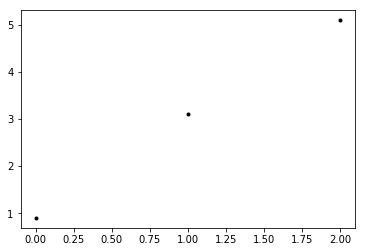

In [38]:
import matplotlib.pyplot as plt

X = np.array([0,1,2])
Y = np.array([0.9, 3.1, 5.1])

plt.plot(X, Y, 'k.')
plt.show()

很显然这是一个一元线性回归，根据上面的介绍，我们可以定义出损失函数和参数 a, b 的更新公式：

In [36]:
# 损失函数
def loss(X, Y, a, b):
    s = 0
    for i in range(X.size):
        s += ((a*X[i] + b)-Y[i])**2
    return s * (1./2*Y.size)

# 参数 a 的更新公式
def update_a(X, Y, a, b, eta):
    s = 0
    for i in range(X.size):
        s += ((a*X[i] + b)-Y[i])*X[i]
    return a - eta * s * (1./Y.size)

# 参数 b 的更新公式
def update_b(X, Y, a, b, eta):
    s = 0
    for i in range(X.size):
        s += ((a*X[i] + b)-Y[i])
    return a - eta * s * (1./Y.size)

我们选取参数的初始值 $(a, b) = (0, 0)$，并令学习率 $\eta = 0.01$，然后进行第一次迭代，并计算损失函数的值和上次损失函数的值之间的差值（这个差值可以用于判断梯度下降过程是否已经收敛，如果两次损失函数的差值足够小，就认为收敛）：

In [39]:
a = 0
b = 0
eta = 0.01

a_new = update_a(X, Y, a, b, eta)
b_new = update_b(X, Y, a, b, eta)
loss_new = loss(X, Y, a_new, b_new)
diff = abs(loss(X, Y, a, b) - loss(X, Y, a_new, b_new))
print("a = {0}, b = {1}, loss = {2}, diff = {3}".format(a_new, b_new, loss_new, diff))

a = 0.04433333333333332, b = 0.03033333333333333, loss = 52.07898433333334, diff = 2.566015666666658


我们不妨画出迭代一次后的图像，很显然，这个差值还比较大，我们需要继续这个过程：

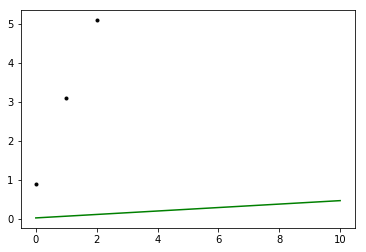

In [40]:
plt.plot(X, Y, 'k.')

x = np.linspace(0, 10, 10)
y = a_new*x+b_new

plt.plot(x, y, 'g-')
plt.show()

我们把这个过程改为迭代 10 次：

In [41]:
for i in range(10):
    a_new = update_a(X, Y, a, b, eta)
    b_new = update_b(X, Y, a, b, eta)
    loss_new = loss(X, Y, a_new, b_new)
    diff = abs(loss(X, Y, a, b) - loss(X, Y, a_new, b_new))
    print("a = {0}, b = {1}, loss = {2}, diff = {3}".format(a_new, b_new, loss_new, diff))
    a = a_new
    b = b_new

a = 0.04433333333333332, b = 0.03033333333333333, loss = 52.07898433333334, diff = 2.566015666666658
a = 0.08762444444444442, b = 0.07391999999999999, loss = 49.271237530348145, diff = 2.807746802985193
a = 0.12975817037037035, b = 0.11634233333333331, loss = 46.614559411210294, diff = 2.656678119137851
a = 0.17076544419753084, b = 0.15763049866666665, loss = 44.10092620251795, diff = 2.5136332086923474
a = 0.21067638180757198, b = 0.1978148181022222, loss = 41.72271421705865, diff = 2.378211985459295
a = 0.2495202939297569, b = 0.23692480314180736, loss = 39.47270402377207, diff = 2.2500101932865846
a = 0.2873257076661762, b = 0.27498917629237457, loss = 37.34405906744128, diff = 2.1286449563307883
a = 0.32412038744214955, b = 0.31203589215992406, loss = 35.330305416106434, diff = 2.013753651334845
a = 0.3599313553965145, b = 0.34809215797946214, loss = 33.42531257835215, diff = 1.9049928377542855
a = 0.39478491122677795, b = 0.38318445359608805, loss = 31.623275333988378, diff = 1.80

可以看到 loss 和 diff 都变得越来越小，说明损失函数在不断收敛，画出现在的图像：

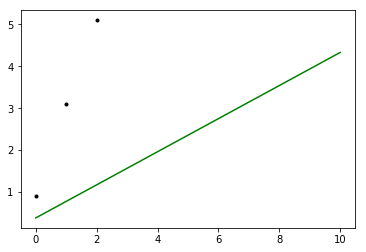

In [42]:
plt.plot(X, Y, 'k.')

x = np.linspace(0, 10, 10)
y = a_new*x+b_new

plt.plot(x, y, 'g-')
plt.show()

比迭代一次靠谱多了，我们再继续这个过程，迭代 1000 次：

In [43]:
for i in range(1000):
    a_new = update_a(X, Y, a, b, eta)
    b_new = update_b(X, Y, a, b, eta)
    loss_new = loss(X, Y, a_new, b_new)
    diff = abs(loss(X, Y, a, b) - loss(X, Y, a_new, b_new))
    a = a_new
    b = b_new
    
print("a = {0}, b = {1}, loss = {2}, diff = {3}".format(a_new, b_new, loss_new, diff))

a = 1.6635910224417298, b = 1.6606816292580078, loss = 0.9622639784521497, diff = 1.5709655798445965e-13


diff 的值已经趋近于 0，说明已经达到收敛，这个时候的图形，就是我们根据梯度下降法求得的结果：

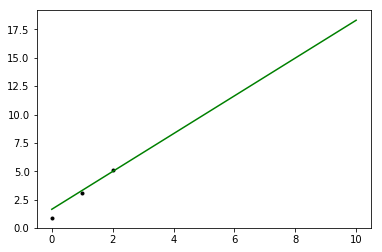

In [44]:
plt.plot(X, Y, 'k.')

x = np.linspace(0, 10, 10)
y = a_new*x+b_new

plt.plot(x, y, 'g-')
plt.show()

### 多元线性回归的梯度下降

上面是对一元线性回归的梯度下降法的介绍，回到线性回归的一般形式：

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \theta^Tx
$$

其对应的损失函数为：

$$
loss = J(\theta_0, \theta_1, \dots, \theta_n) = J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(y^{(i)} - \theta^Tx^{(i)})^2
$$

对 $J(\theta)$ 进行求导，得到参数 $\theta$ 的更新公式：

$$
\left\{
\begin{align}
\theta_0 &:= \theta_0 - \eta \frac{1}{m} \sum_{i=1}^{m}(y^{(i)} - \theta^Tx^{(i)})x_0^{(i)} \\
\theta_1 &:= \theta_1 - \eta \frac{1}{m} \sum_{i=1}^{m}(y^{(i)} - \theta^Tx^{(i)})x_1^{(i)} \\
\theta_2 &:= \theta_2 - \eta \frac{1}{m} \sum_{i=1}^{m}(y^{(i)} - \theta^Tx^{(i)})x_2^{(i)} \\
\vdots \\
\theta_n &:= \theta_n - \eta \frac{1}{m} \sum_{i=1}^{m}(y^{(i)} - \theta^Tx^{(i)})x_n^{(i)} \\
\end{align}
\right.
$$

其中，$m$ 表示样本个数，$n$ 表示特征维度，$x^{(i)}$ 表示第 i 个样本，$x^{(i)}_n$ 表示第 i 个样本的第 n 个特征。
为了方便表达和计算，损失函数也可以写成下面的矩阵形式：

$$
loss = J(\theta) = \frac{1}{2m} (\bf{y}-\rm{X}\theta)^T (\bf{y}-\rm{X}\theta)
$$

根据前面的矩阵求导，得到梯度下降的更新公式为：

$$
\begin{aligned}
\theta &:= \theta - \eta \frac{\partial}{\partial\theta}J(\theta) \\
       &= \theta - \eta \frac{1}{m} X^T(\rm{X}\theta-\bf{y})
\end{aligned}
$$

TODO：使用矩阵的迹（Trace）求矩阵导数。

我们把上面的代码改成矩阵计算的形式：

theta: 0.9333333336913473 2.099999999741958
loss: [[0.01]]


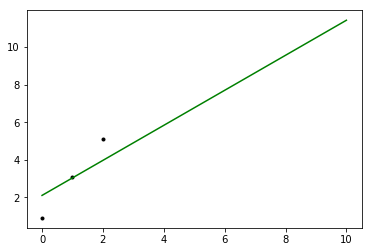

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# 计算损失函数 J 的梯度
def gradient_function(theta, X, y):
    diff = np.dot(X, theta) - y
    return (1./y.size) * np.dot(np.transpose(X), diff)

# 梯度下降
def gradient_descent(X, y, eta, theta_init, max_iter):
    theta = theta_init
    i = 0
    gradient = gradient_function(theta, X, y)
    while not np.all(np.absolute(gradient) <= 1e-10):
        theta = theta - eta * gradient
#         print('theta:', theta[0,0], theta[1,0])
        i += 1
        if i > max_iter:
            break
        gradient = gradient_function(theta, X, y)
#         print('gradient:', gradient[0,0], gradient[1,0])
    return theta

# 损失函数
def loss_function(theta, X, y):
    diff = np.dot(X, theta) - y
    return (1./2*y.size) * np.dot(np.transpose(diff), diff)

# 数据集
X0 = np.ones((3, 1))
X1 = np.array([0,1,2]).reshape(-1, 1)
X = np.hstack((X0, X1))
y = np.array([0.9, 3.1, 5.1]).reshape(-1, 1)

# 学习率
eta = 0.01

# 最大迭代次数
max_iter = 10000

# 初始值
theta_init = np.array([0, 0]).reshape(-1, 1)

# 使用梯度下降求解线性回归
theta = gradient_descent(X, y, eta, theta_init, max_iter)
print('theta:', theta[0,0], theta[1,0])
print('loss:', loss_function(theta, X, y))

# 绘制图形
plt.plot(X1, y, 'k.')
x = np.linspace(0, 10, 10)
y = theta[0,0]*x+theta[1,0]
plt.plot(x, y, 'g-')
plt.show()

### 疑惑一

为什么上面两种方法求出来的解不一样？

### 疑惑二

在前面介绍正规方程法解一元线性回归时，使用了下面的数据集，这个数据集不知道为什么用梯度下降法无法收敛？

```
X = np.array([39.93, 42.05, 43.18, 44.68, 49.87, 53.57])
Y = np.array([199,   290,   298,   310,   399,   420])
```

theta: 0.7489393245009788 7.078701795630663
loss: [[32892.8042478]]


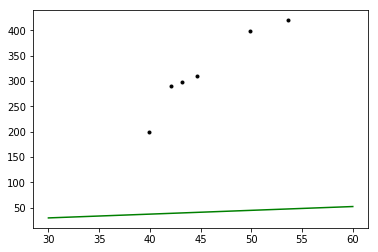

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# 计算损失函数 J 的梯度
def gradient_function(theta, X, y):
    diff = np.dot(X, theta) - y
    return (1./y.size) * np.dot(np.transpose(X), diff)

# 梯度下降
def gradient_descent(X, y, eta, theta_init, max_iter):
    theta = theta_init
    i = 0
    gradient = gradient_function(theta, X, y)
    while not np.all(np.absolute(gradient) <= 1e-10):
        theta = theta - eta * gradient
        i += 1
        if i > max_iter:
            break
        gradient = gradient_function(theta, X, y)
    return theta

# 损失函数
def loss_function(theta, X, y):
    diff = np.dot(X, theta) - y
    return (1./2*y.size) * np.dot(np.transpose(diff), diff)

# 数据集
X0 = np.ones((6, 1))
X1 = np.array([39.93, 42.05, 43.18, 44.68, 49.87, 53.57]).reshape(-1, 1)
X = np.hstack((X0, X1))
y = np.array([199,   290,   298,   310,   399,   420]).reshape(-1, 1)

# 学习率
eta = 0.00001

# 最大迭代次数
max_iter = 10000

# 初始值
theta_init = np.array([1, 1]).reshape(-1, 1)

# 使用梯度下降求解线性回归
theta = gradient_descent(X, y, eta, theta_init, max_iter)
print('theta:', theta[0,0], theta[1,0])
print('loss:', loss_function(theta, X, y))

# 绘制图形
plt.plot(X1, y, 'k.')
x = np.linspace(30, 60, 100)
y = theta[0,0]*x+theta[1,0]
plt.plot(x, y, 'g-')
plt.show()

### 标准化和归一化

在实际的运用中我们选取的特征，比如长度，重量，面积等等，通常单位和范围都不同，这会导致梯度下降算法变慢，所以我们要将特征缩放到相对统一的范围内。通常的方法有 **标准化（Standardization）** 和 **归一化（Normalization）**。

标准化是把数据变成符合标准的正态分布，由 **中心极限定理** 可知，当数据量足够大时，无论原来的数据是何种分布，都可以通过下面的更新公式转变成正态分布：

$$
x_i := \frac{x_i-\mu}{\delta}
$$

归一化对梯度下降算法很友好，可以让算法最终收敛并且提高训练速度和精度，归一化的更新公式为：

$$
x_i := \frac{x_i-min(x_i)}{max(x_i)-min(x_i)}
$$